# Инструменты для анализа данных: numpy и matplotlib

[ссылка на оригинальный ноутбук](https://miptstats.github.io/courses/ad_fivt/python_digest.html)

## 1. NumPy

В пакете  NumPy представлены удобные функции для работы c $n$-мерными массивами. В нём имеются функции для поэлементных операций, а также для работы с массивами, как с математическими объектами, например, функции для линейной алгебры.

Они реализованы на C++, поэтому гораздо эффективнее аналогичных реализаций на Python.

In [1]:
import numpy as np

### 1.1 Основы

Создавать массивы можно различными способами.

In [2]:
# Из списка
a = np.array([0, 2, 1])

# Из равномерной сетки
grid = np.linspace(0, 1, 500)

# Перечисление 0, 1, 2, 3, 4
nat_grid = np.arange(5)

# Заполненный нулями
zeros = np.zeros((1, 2, 3))

У массивов можно узнать их размерность, форму и число элементов

In [4]:
print(zeros.ndim, zeros.shape, zeros.size)

3 (1, 2, 3) 6


Индексация похожа на индексацию списков

In [5]:
print(a[2:1:-1])
print(grid[::100])
print(zeros[:, :2, :2])

[1]
[0.         0.2004008  0.4008016  0.6012024  0.80160321]
[[[0. 0.]
  [0. 0.]]]


In [10]:
a = [[1,2],[3,4]]
print(a)
print(a[1][0])

[[1, 2], [3, 4]]
3


In [16]:
a_np = np.array(a)
print(a_np)
print(a_np.shape)
print(a_np[1, ::-1])
print(a_np[1][0])

[[1 2]
 [3 4]]
(2, 2)
[4 3]
3


In [18]:
print(f"{a_np.dtype=}")

a_np.dtype=dtype('int64')


Integer overflow example

In [22]:
a_np_uint8 = a_np.astype(np.uint8)
print(a_np_uint8)

[[1 2]
 [3 4]]


In [25]:
print(a_np_uint8 + 1)

[[2 3]
 [4 5]]


In [31]:
print(a_np_uint8 + 255)

[[0 1]
 [2 3]]


### 1.2 Соединение массивов и их форма

Из одномерного массива можно сделать двумерный, указав необходимую форму.

In [45]:
A = np.arange(6).reshape((2, 3))  # произведение изначальных размерностей == произведение целевых размерностей
A

array([[0, 1, 2],
       [3, 4, 5]])

Два массива можно склеить горизонтально

In [46]:
B = np.zeros((2, 5))
print(B)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [47]:
np.hstack([A, B])

array([[0., 1., 2., 0., 0., 0., 0., 0.],
       [3., 4., 5., 0., 0., 0., 0., 0.]])

In [48]:
np.concatenate((A, B), axis=1)

array([[0., 1., 2., 0., 0., 0., 0., 0.],
       [3., 4., 5., 0., 0., 0., 0., 0.]])

и вертикально

In [49]:
B = np.zeros((1, 3))
print(B)

[[0. 0. 0.]]


In [50]:
np.vstack([A, B])

array([[0., 1., 2.],
       [3., 4., 5.],
       [0., 0., 0.]])

In [51]:
np.concatenate((A, B), axis=0)

array([[0., 1., 2.],
       [3., 4., 5.],
       [0., 0., 0.]])

### 1.3 Операции над массивами

Обычные арифметические операции работают поэлементно.

In [69]:
a = np.array([1, 2, 3])
b = np.array([3, 4, 5])

In [70]:
print(a * 3)

[3 6 9]


In [71]:
print(a * b)

[ 3  8 15]


In [72]:
print(np.sin(a))

[0.84147098 0.90929743 0.14112001]


In [73]:
np.exp(a)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [75]:
np.power(a, b)

array([  1,  16, 243])

In [61]:
a**2

array([1, 4, 9])

Двумерный массив можно умножить на одномерный, как матрицу на вектор. Операция `@` реализует матричное умножение

In [82]:
# 2x3
A = np.ones((2, 3))
# 3x1
b = np.ones(3)
# 2x1
# __matmul__ is called
print((A @ b).shape)
A @ b

(2,)


array([3., 3.])

In [83]:
# 2x3
A = np.ones((2, 3))
# 3x1
b = np.ones((3, 1))
print((A @ b).shape)
A @ b

(2, 1)


array([[3.],
       [3.]])

Транспонировать матрицу можно с помощью метода `T`

In [84]:
A.T.shape

(3, 2)

In [87]:
A = np.array([[4, 0], [0, 4]])
print(f"det: {np.linalg.det(A)}")
print(f"inv: \n{np.linalg.inv(A)}")
print(f"A@A^-1: \n{A @ np.linalg.inv(A)}")

det: 15.999999999999998
inv: 
[[0.25 0.  ]
 [0.   0.25]]
A@A^-1: 
[[1. 0.]
 [0. 1.]]


### 1.4 Способы суммирования

Простое суммирование возвращает сумму всех элементов массива.

In [97]:
print(np.sum(a))
print(a.sum())

6
6


С многомерными массивами суммирование может работать сложнее. Например, можно суммировать вдоль определённой оси и получать не одно число, а массив.

In [103]:
a = np.ones((3, 4), dtype=int)
print(a.sum(axis=1))
print(a.sum(axis=0))

[4 4 4]
[3 3 3 3]


Для более продвинутых способов суммирования существуют, например, суммы Эйнштейна.

In [104]:
A = np.array([0, 1, 2])
B = np.array([[10, 15, 20], [100, 150, 200]])
print(A)
print(B)

[0 1 2]
[[ 10  15  20]
 [100 150 200]]


In [106]:
# einops library -> more efficient
np.einsum('i,ji->j', A, B)

array([ 55, 550])

В данном случае индексы суммирования приводят к такому вычислению:

* $c_0 = a_0 \cdot b^0_0 + a_1 \cdot b^1_0 + a_2 \cdot b^2_0$. В нашем случае: $c_0 = 0 \cdot 1 + 1 \cdot 15 + 2 \cdot 20$.
* $c_1 = a_0 \cdot b^0_1 + a_1 \cdot b^1_1 + a_2 \cdot b^2_1$. В нашем случае: $c_1 = 0 \cdot 1 + 1 \cdot 150 + 2 \cdot 200$.

Чтобы подробно разобраться в синтаксисе, посмотрите <a href="https://miptstats.github.io/courses/python/05_numpy.html">полный материал</a>.

### 1.5 Бродкастинг

Broadcasting &mdash; процедура обработки массивов с различными формами во время арифметических операций. При соблюдении определенных ограничений меньший массив приводится к форме по большему массиву.

Рассмотрим поэлементное умножение двух массивов одинаковой формы

In [107]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

А теперь массивы разной формы

In [108]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

Результат получился тем же, поскольку в данном случае произошло растяжение массива `b` до размеров массива `a` с помощью дублирования элементов массива `b`.

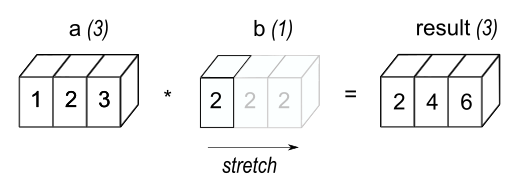

*Примечание.* Термин "растяжение" используется лишь для понимания. Операции реализуются более "умным" способом без лишнего копирования элементов.

**Правило бродкастинга**

При работе с двумя массивами numpy сравнивает их формы начиная с крайних правых размерностей. Два измерения совместимы, если
* они равны или
* одна из них равна 1.
Если эти условия не выполняются, возникает `ValueError`.

Посмотрим еще на пример

In [120]:
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (2,1,5) 

Растяжение в данном случае произошло следующим образом
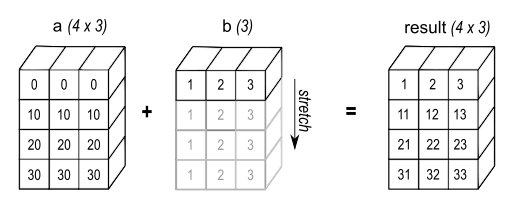

А если размеры будут не совместимы, то произойдет ошибка
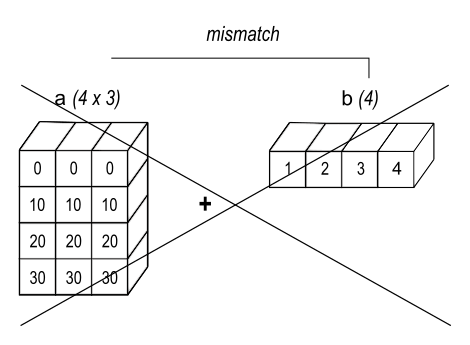

In [121]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

Если массивы имеют несовместимый размер, можно их сначала привести к одной форме

In [124]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
print(a.shape)
print(b.shape)
a.reshape((-1, 1)) + b

(4,)
(3,)


array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

Соответствующее растяжение
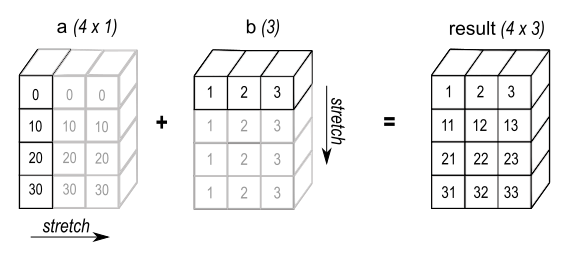

## 2. Matplotlib

Модуль `matplotlib` — одно из популярных средств для построения графиков. При использовании `matplotlib` не забудьте написать `%matplotlib inline` для того, чтобы графики отображались в вашем окне браузера.

Начнём с построения простых графиков.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

График, соединяющий точки, строится с помощью `plt.plot`. Передаём список $x$ и $y$. Если не хотите соединять точки, используйте `plt.scatter`.

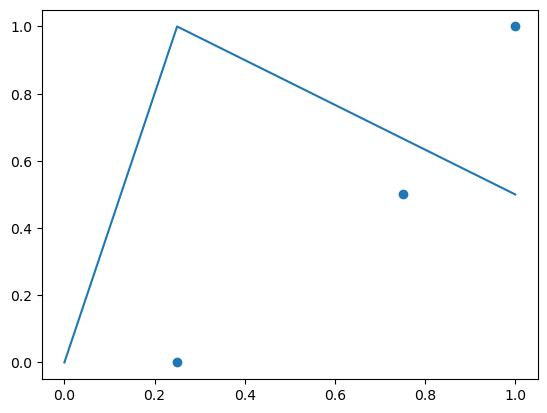

In [2]:
plt.figure()
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.scatter([0.25, 0.75, 1], [0, 0.5, 1])
plt.show()

Можно изображать несколько кривых, тогда они будут рисоваться разными цветами. Чтобы рисовать график функции, достаточно соединить много точек.

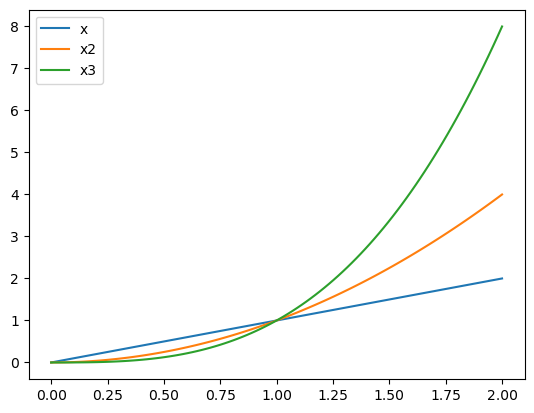

In [3]:
x = np.linspace(0, 2, 100)

plt.figure()
plt.plot(x, x, label="x")
plt.plot(x, x**2, label="x2")
plt.plot(x, x**3, label="x3")
plt.legend()
plt.show()

На график можно добавить подписи, легенду, настроить цвета и стиль линий.

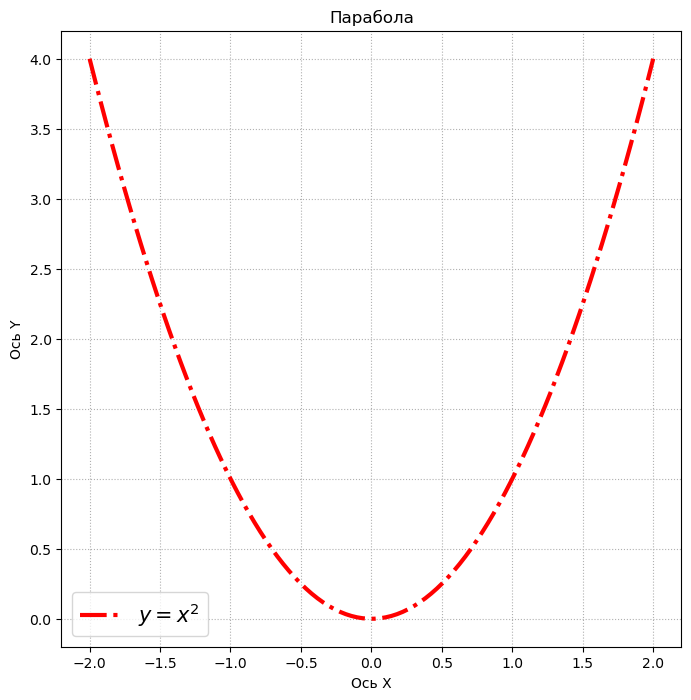

In [4]:
x = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.plot(x, x ** 2, linestyle='-.', lw=3, 
         label='$y=x^2$', color='red')
plt.xlabel('Ось X'), plt.ylabel('Ось Y')
plt.legend(fontsize=15, loc="best")
plt.title('Парабола')
plt.grid(ls=':')
plt.show()

Закрасить область между двумя кривыми $y=y(x)$ можно с помощью функции `plt.fill_between`, а между двумя кривыми вида $x = x(y)$ ---  с помощью функции `plt.fill_betweenx`.

Горизонтальные линии можно нарисовать с помощью `plt.hlines`, а вертикальные --- с помощью `plt.vlines`.

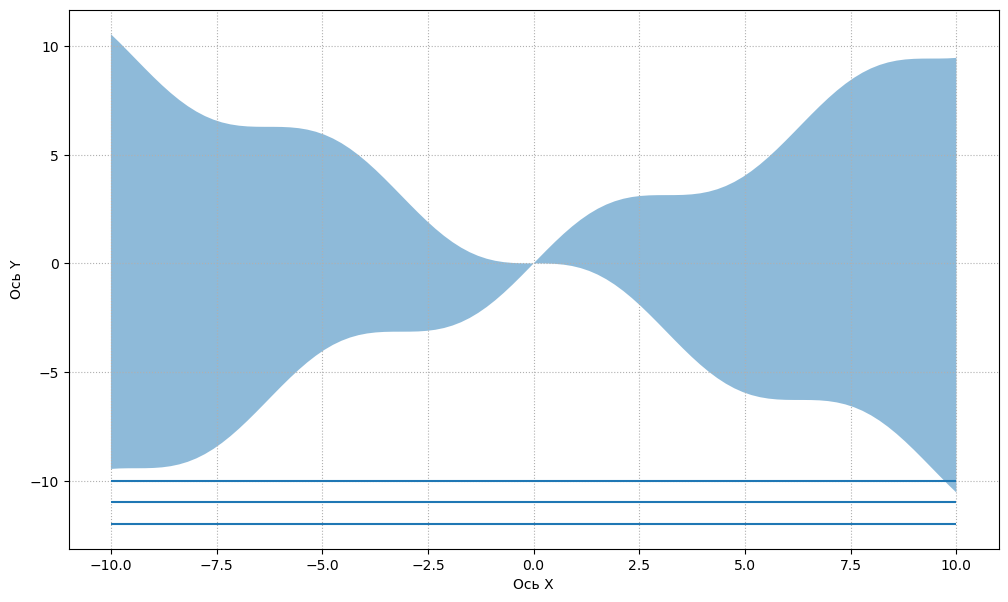

In [5]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 7))
plt.fill_between(x, -x+np.sin(x), x+np.sin(x), alpha=0.5)
plt.hlines([-10, -11, -12], -10, 10)
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(ls=':')
plt.show()

Кроме графиков в двумерных координатах, `matplotlib` позволяет строить трёхмерные графики или поверхности.

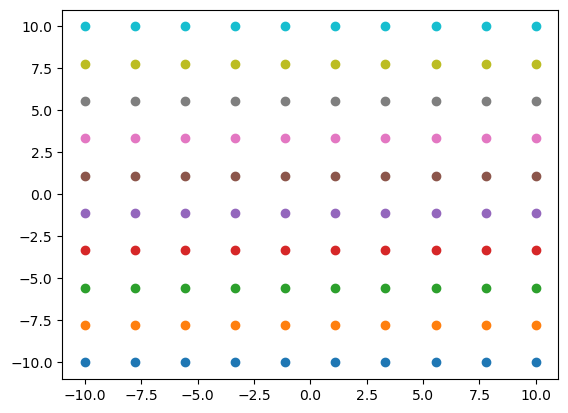

In [10]:
# meshgrid visualization

a = np.linspace(-10, 10, 10)
x, y = np.meshgrid(a, a)

plt.figure()
for i in range(10):
    plt.scatter(x[i], y[i])
plt.show()

In [8]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.show()

<Figure size 640x480 with 0 Axes>

Чтобы посмотреть, как ещё можно настраивать графики в matplotlib, строить контурные графики и делать пиксельные картинки, можете перейти к <a href="https://miptstats.github.io/courses/python/06_matplotlib.html">полному материалу</a>.